In [1]:
#download java_profiles

!echo "export JAVA_HOME=$(/usr/libexec/java_home)" >> ~/.bash_profile
!source ~/.bash_profile
!javac

/Users/marina/.bash_profile:17: permission denied: /Users/marina
/Users/marina/.bash_profile:52: permission denied: /Users/marina
/Users/marina/.bash_profile:53: permission denied: /Users/marina
Usage: javac <options> <source files>
where possible options include:
  @<filename>                  Read options and filenames from file
  -Akey[=value]                Options to pass to annotation processors
  --add-modules <module>(,<module>)*
        Root modules to resolve in addition to the initial modules, or all modules
        on the module path if <module> is ALL-MODULE-PATH.
  --boot-class-path <path>, -bootclasspath <path>
        Override location of bootstrap class files
  --class-path <path>, -classpath <path>, -cp <path>
        Specify where to find user class files and annotation processors
  -d <directory>               Specify where to place generated class files
  -deprecation
        Output source locations where deprecated APIs are used
  --enable-preview
        Enable p

In [2]:
#download mallet package for LDA 

!~/mallet-2.0.8/bin/mallet import-file
%pip install little_mallet_wrapper
%pip install seaborn
%pip install pandas
%pip install scipy
import little_mallet_wrapper
import seaborn
import glob
from pathlib import Path
import pandas as pd
import random
pd.options.display.max_colwidth = 100


A tool for creating instance lists of feature vectors from comma-separated-values
--help TRUE|FALSE
  Print this command line option usage information.  Give argument of TRUE for longer documentation
  Default is false
--prefix-code 'JAVA CODE'
  Java code you want run before any other interpreted code.  Note that the text is interpreted without modification, so unlike some other Java code options, you need to include any necessary 'new's when creating objects.
  Default is null
--config FILE
  Read command option values from a file
  Default is null
--input FILE
  The file containing data to be classified, one instance per line
  Default is null
--output FILE
  Write the instance list to this file; Using - indicates stdout.
  Default is text.vectors
--line-regex REGEX
  Regular expression containing regex-groups for label, name and data.
  Default is ^(\S*)[\s,]*(\S*)[\s,]*(.*)$
--label INTEGER
  The index of the group containing the label string.
   Use 0 to indicate that the label f

In [3]:
%pip install -U scikit-learn scipy matplotlib
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.stem import WordNetLemmatizer

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install statsmodels 
from statsmodels.tsa.stattools import grangercausalitytests


Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install pyLDAvis

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()


Note: you may need to restart the kernel to use updated packages.


In [6]:
#import pyLDAvis.sklearn

In [7]:
import numpy as np
from sklearn.utils import check_random_state
from sklearn.decomposition._online_lda_fast import _dirichlet_expectation_2d

class PTW_LDA(LatentDirichletAllocation):
    
    def __init__ (self, n_components=10, ptws=None, **kwargs):
        super(PTW_LDA, self).__init__(n_components, **kwargs)
        self.ptws = ptws

    #def __init__(self, n_components=10, *, doc_topic_prior=None,
                 #topic_word_prior=None, learning_method='batch',
                 #learning_decay=.7, learning_offset=10., max_iter=10,
                 #batch_size=128, evaluate_every=-1, total_samples=1e6,
                 #perp_tol=1e-1, mean_change_tol=1e-3, max_doc_update_iter=100,
                 #n_jobs=None, verbose=0, random_state=None, 
                 #ptws=None):
       # super(PTW_LDA, self).__init__(n_components, doc_topic_prior, topic_word_prior, 
                                      #learning_method, learning_decay, learning_offset, 
                                      #max_iter, batch_size, evaluate_every, total_samples, 
                                      #perp_tol, mean_change_tol, max_doc_update_iter, 
                                      #n_jobs, verbose, random_state)
        #self.ptws = ptws

    def _init_latent_vars(self, n_features, dtype=None):
        """Initialize latent variables."""

        self.random_state_ = check_random_state(self.random_state)
        self.n_batch_iter_ = 1
        self.n_iter_ = 0

        if self.doc_topic_prior is None:
            self.doc_topic_prior_ = 1. / self.n_components
        else:
            self.doc_topic_prior_ = self.doc_topic_prior

        if self.topic_word_prior is None:
            self.topic_word_prior_ = 1. / self.n_components
        else:
            self.topic_word_prior_ = self.topic_word_prior

        init_gamma = 100.
        init_var = 1. / init_gamma
        # In the literature, this is called `lambda`
        self.components_ = self.random_state_.gamma(
            init_gamma, init_var, (self.n_components, n_features))

        # Transform topic values in matrix for prior topic words
        if self.ptws is not None:
            for ptw in self.ptws:
                word_index = ptw[0]
                word_topic_values = ptw[1]
                self.components_[:, word_index] *= word_topic_values

        # In the literature, this is `exp(E[log(beta)])`
        self.exp_dirichlet_component_ = np.exp(
            _dirichlet_expectation_2d(self.components_))

In [8]:
#create special path for LDA outputs
path_to_mallet = '/Users/marina/mallet-2.0.8/bin/mallet'
#import telegram-data from one source
%pip install openpyxl
papers = pd.read_excel('agro_prep.xlsx')
#read the values of the file in the dataframe
data = pd.DataFrame(papers, columns=['text', 'DatePosted'])

# print out the first rows of papers
papers.head()

Note: you may need to restart the kernel to use updated packages.


,Unnamed: 0.1,Unnamed: 0,DatePosted,text
0,0,1123634,2020-04-21 11:18:12,NaN
1,1,1123635,2020-04-21 11:57:45,"['закончиться', 'пятый', 'день', 'торг', 'зерно', 'государственный', 'интервенционный', 'фонд', ..."
2,2,1123636,2020-04-21 13:27:28,"['“яндекс”', 'вести', 'переговоры', 'участник', 'агрорынок', 'реализация', 'логистический', 'про..."
3,3,1123637,2020-04-21 14:58:45,"['участник', 'рынок', 'сельскохозяйственный', 'техника', 'ожидать', 'близкий', 'шесть', 'месяц',..."
4,4,1123638,2020-04-22 18:35:57,"['покупательский', 'способность', 'население', 'падать', 'поэтому', 'структура', 'спрос', 'мясно..."


In [9]:
papers['text'] = papers['text'].astype(str)

In [10]:
#Date Formatting For Time Series Plot
papers['DatePosted'] = pd.to_datetime(papers['DatePosted'])
papers['year'] = pd.to_datetime(papers['DatePosted'].dt.year, format='%Y')
papers['year-month'] = papers['DatePosted'].dt.to_period('M')
papers['Date'] = [month.to_timestamp() for month in papers['year-month']]

papers['Date'] = pd.to_datetime(papers['Date'],format='%Y%m%d')
papers = papers.drop(columns=['DatePosted', 'Unnamed: 0.1', 'Unnamed: 0', 'year-month', 'year'])
papers.head()


,text,Date
0,nan,2020-04-01
1,"['закончиться', 'пятый', 'день', 'торг', 'зерно', 'государственный', 'интервенционный', 'фонд', ...",2020-04-01
2,"['“яндекс”', 'вести', 'переговоры', 'участник', 'агрорынок', 'реализация', 'логистический', 'про...",2020-04-01
3,"['участник', 'рынок', 'сельскохозяйственный', 'техника', 'ожидать', 'близкий', 'шесть', 'месяц',...",2020-04-01
4,"['покупательский', 'способность', 'население', 'падать', 'поэтому', 'структура', 'спрос', 'мясно...",2020-04-01


Note: you may need to restart the kernel to use updated packages.


/Users/marina/opt/anaconda3/envs/my_env/lib/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


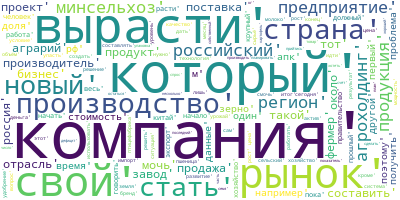

In [11]:
# ITERATED WORD CLOUD FOR EXCLUDING IRRELEVANT THE MOST FREQUENT WORDS
%pip install wordcloud
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [12]:
import numpy as np
import pandas as pd
import re
%pip install nltk
import nltk
%pip install  spacy
import spacy
import string
pd.options.mode.chained_assignment = None

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [13]:
#Read the CPI data 
dem_data = pd.read_excel('cpi_full.xlsx')

#Date Formatting For Time Series Plot
dem_data['_date_'] = pd.to_datetime(dem_data['_date_'])
dem_data['year'] = pd.to_datetime(dem_data['_date_'].dt.year, format='%Y')
dem_data['year-month'] = dem_data['_date_'].dt.to_period('M')
dem_data['Date'] = [month.to_timestamp() for month in dem_data['year-month']]
dem_data = dem_data.set_index('Date')
dem_data.head()


print(dem_data.head())



               _date_  Food  Meat  Fish  Oils&Fats      Milk    Cheese  \
Date                                                                     
2007-03-01 2007-03-01  0.77  0.24  0.84   0.295237  0.445796  0.235641   
2007-04-01 2007-04-01  0.75  0.38  0.51   0.191035  0.752425  1.755177   
2007-05-01 2007-05-01  0.95  0.35  0.12   0.423305  0.948525  2.129986   
2007-06-01 2007-06-01  1.73  0.57  0.38   1.021710  1.063682  1.805424   
2007-07-01 2007-07-01  1.42  0.65  0.36   1.696128  1.171984  1.910671   

                Eggs     Sugar  Confectionery  ...  Communication Services  \
Date                                           ...                           
2007-03-01  2.469164 -1.719944           0.63  ...                    0.09   
2007-04-01  0.266261  1.137299           0.48  ...                   -0.06   
2007-05-01 -0.614716  1.925583           0.45  ...                    0.05   
2007-06-01 -0.524692  1.652096           0.48  ...                    0.09   
2007-07-01  7

In [14]:
from spacy.lang.ru.stop_words import STOP_WORDS

In [15]:
# Generate feature vector and document vs. term matrix
# Note: the individual matrix values are term frequencies for each document
cv = CountVectorizer(stop_words=list(STOP_WORDS), max_df=3500)
ft_cv = cv.fit_transform(papers['text'])
vocabulary = cv.get_feature_names_out()
doc_term_matrix = pd.DataFrame(ft_cv.toarray(), columns=vocabulary)

print(doc_term_matrix.shape)
print(doc_term_matrix.head())

(3299, 21862)
   nan  u200b  u200bагентство  u200bаграрий  u200bагроинженерный  \
0    1      0               0             0                    0   
1    0      0               0             0                    0   
2    0      0               0             0                    0   
3    0      0               0             0                    0   
4    0      0               0             0                    0   

   u200bагрострахование  u200bагротех  u200bагрохолдинг  u200bагроэкспансия  \
0                     0             0                 0                   0   
1                     0             0                 0                   0   
2                     0             0                 0                   0   
3                     0             0                 0                   0   
4                     0             0                 0                   0   

   u200bбелгородский  ...  яшкинский  ящик  ящур  ёбидоеби  ёж  ёлкин  ёлочка  \
0                  0 

In [16]:
# Generate word stream
# Note: the individual matrix value are term frequencies for each date
doc_term_matrix['Date'] = papers['Date']
aggregator_words = {i: 'sum' for i in vocabulary}
word_stream = doc_term_matrix.groupby(['Date']).agg(aggregator_words)

print(word_stream.shape)
print(word_stream.head())

(38, 21862)
            nan  u200b  u200bагентство  u200bаграрий  u200bагроинженерный  \
Date                                                                        
2020-04-01    1      1               0             0                    0   
2020-05-01    0     12               0             0                    0   
2020-06-01    0      4               0             0                    0   
2020-07-01    0      7               0             0                    0   
2020-08-01    5      7               0             0                    0   

            u200bагрострахование  u200bагротех  u200bагрохолдинг  \
Date                                                               
2020-04-01                     0             0                 0   
2020-05-01                     0             0                 1   
2020-06-01                     1             0                 0   
2020-07-01                     0             0                 0   
2020-08-01                     0        

In [17]:
# Add CPI  data to word_stream
combined_word_dem_data = pd.concat([dem_data, word_stream], axis=1, join='inner')
print(combined_word_dem_data.head())
print(pd.date_range(start='2020-04-21',end='2022-09-01').difference(combined_word_dem_data.index))

               _date_  Food  Meat  Fish  Oils&Fats      Milk    Cheese  \
Date                                                                     
2020-04-01 2020-04-01  1.72  0.93  0.71   0.762645  0.596495  0.541643   
2020-05-01 2020-05-01  0.16 -0.29  0.47   0.428409  0.373090  0.373884   
2020-06-01 2020-06-01  0.17  0.23  0.11   0.807636  0.345193  0.521885   
2020-07-01 2020-07-01 -0.07  0.38  0.18   0.685033  0.263164  0.287690   
2020-08-01 2020-08-01 -0.77  0.35  0.17   0.694616  0.565825  0.382969   

                Eggs     Sugar  Confectionery  ...  яшкинский  ящик  ящур  \
Date                                           ...                          
2020-04-01  4.533703  6.192353           0.38  ...          0     0     0   
2020-05-01  5.802315 -0.942907           0.60  ...          0     0     0   
2020-06-01 -1.514241  0.554855           0.66  ...          0     0     0   
2020-07-01  2.898156  2.579324           0.35  ...          0     0     0   
2020-08-01 -0.03992

In [18]:
# Fit LDA model to feature vector
k = 15
count = 0
max_iterations = 1

prior_topic_words = []
#prior_topic_words.append((vocabulary.index('oil'), [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))
#print(prior_topic_words)


In [19]:
import pyLDAvis.lda_model
...
pyLDAvis.lda_model.prepare

<function pyLDAvis.lda_model.prepare(lda_model, dtm, vectorizer, **kwargs)>

log likelihood score, 15 topics: -2450669.137724682
(15, 21862)
(3299, 16)
                  0         1         2         3         4          5   \
Date                                                                      
2020-04-01  0.166925  0.565583  0.358393  0.228546  0.121006   2.331468   
2020-05-01  2.535130  0.759476  0.248794  0.984488  0.409192  16.014317   
2020-06-01  0.864037  1.036494  0.456930  0.699431  0.423103  11.107053   
2020-07-01  1.032948  0.550572  0.343833  0.613570  0.246782  12.883697   
2020-08-01  1.827148  0.966123  0.853866  0.446190  0.590639   9.191662   

                  6          7          8         9         10         11  \
Date                                                                        
2020-04-01  0.679245   8.710606   9.193593  0.443614  0.648403   4.155590   
2020-05-01  0.440539  22.049834  28.046346  1.044738  3.183163  11.386957   
2020-06-01  0.412387  32.074547  26.882328  2.450669  1.815851  14.668516   
2020-07-01  0.

<Figure size 1600x1000 with 0 Axes>

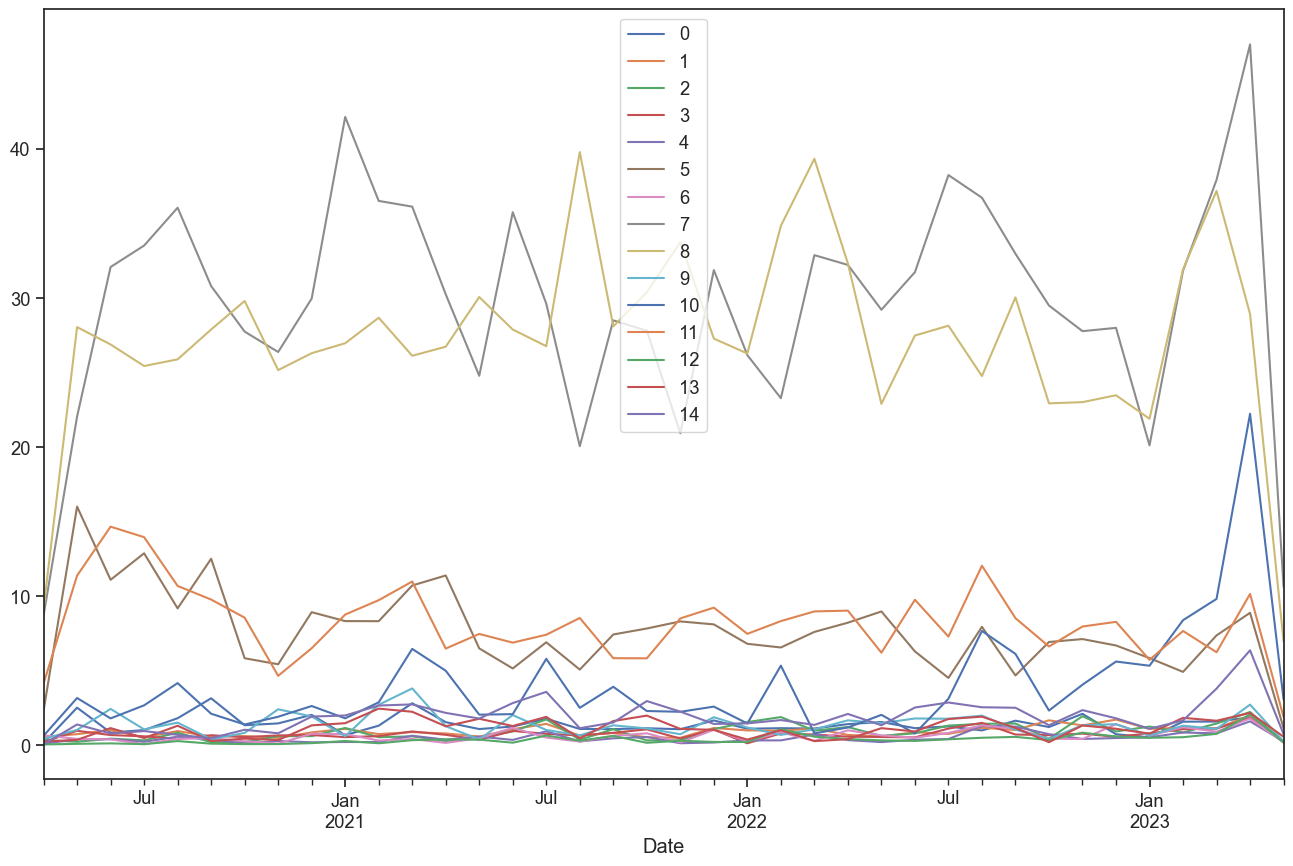

               _date_  Food  Meat  Fish  Oils&Fats      Milk    Cheese  \
Date                                                                     
2020-04-01 2020-04-01  1.72  0.93  0.71   0.762645  0.596495  0.541643   
2020-05-01 2020-05-01  0.16 -0.29  0.47   0.428409  0.373090  0.373884   
2020-06-01 2020-06-01  0.17  0.23  0.11   0.807636  0.345193  0.521885   
2020-07-01 2020-07-01 -0.07  0.38  0.18   0.685033  0.263164  0.287690   
2020-08-01 2020-08-01 -0.77  0.35  0.17   0.694616  0.565825  0.382969   

                Eggs     Sugar  Confectionery  ...          5         6  \
Date                                           ...                        
2020-04-01  4.533703  6.192353           0.38  ...   2.331468  0.679245   
2020-05-01  5.802315 -0.942907           0.60  ...  16.014317  0.440539   
2020-06-01 -1.514241  0.554855           0.66  ...  11.107053  0.412387   
2020-07-01  2.898156  2.579324           0.35  ...  12.883697  0.088669   
2020-08-01 -0.039926  2.975251 

/Users/marina/opt/anaconda3/envs/my_env/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/marina/opt/anaconda3/envs/my_env/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/marina/opt/anaconda3/envs/my_env/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/marina/opt/anaconda3/envs/my_env/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/Users/marina/opt/anaconda3/envs/my_env/lib/python3.11/site-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/User

InfeasibleTestError: The x values include a column with constant values and so the test statistic cannot be computed.

In [20]:
while (count < max_iterations):
    count+=1
    
    lda = PTW_LDA(n_components=15, learning_method='online', ptws=prior_topic_words)
    
    max_iterations = lda.max_iter

    lda.fit(ft_cv)

    print('log likelihood score, ' + str(k) + ' topics: ' + str(lda.score(ft_cv)))

    pyLDAvis.enable_notebook()
    p = pyLDAvis.lda_model.prepare(lda, ft_cv, cv)
    pyLDAvis.display(p)
    
    # Generate topic vs. word matrix
    # Note: the individual matrix values are pseudo counts NOT probabilities
    topic_word_matrix = pd.DataFrame((lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]), columns=vocabulary)
    print(topic_word_matrix.shape)

    # Generate document vs. topic coverage matrix
    lda_out = lda.transform(ft_cv)
    doc_topic_matrix = pd.DataFrame(lda_out)
    doc_topic_matrix['Date'] = papers['Date']
    print(doc_topic_matrix.shape)

    # Aggregate topic coverages by each date and create topic_stream
    aggregator_topics = {i: 'sum' for i in range(k)}
    topic_stream = doc_topic_matrix.groupby(['Date']).agg(aggregator_topics)
    print(topic_stream.head())

    # Plot resulting topic streams
    plt.rcParams['figure.figsize'] = [16, 10]
    plt.figure()
    topic_stream.plot()
    plt.show()
    
    # Prepare dem_data and topic_stream for Granger tests
    combined_topic_dem_data = pd.concat([dem_data, topic_stream], axis=1, join='inner')
    print(combined_topic_dem_data.head())
    print(pd.date_range(start='2020-04-21',end='2022-09-01').difference(combined_topic_dem_data.index))

    # Run Granger tests  against each topic and output the p values for F tests against each lag
    granger_topic_results = []

    for i in range(1,6):
            granger_topic_results.append([grangercausalitytests(combined_topic_dem_data[['Milk',j]],[i],verbose=False)[i][0]['ssr_ftest'][1] for j in range(k)])

    # Aggregate p values via mean to determine optimal lag
    granger_topic_df = pd.DataFrame(granger_topic_results)
    granger_topic_df.index = granger_topic_df.index + 1
    granger_topic_df['MeanP'] = granger_topic_df.mean(axis=1)
    granger_topic_df.sort_values(by=['MeanP'], inplace=True)
    optimal_lag = granger_topic_df.index[0]
    print(granger_topic_df)

    # With optimal lag, sort topics by p values in ascending order
    granger_topic_df.drop(['MeanP'], axis=1, inplace=True)
    topic_p_values = granger_topic_df.loc[optimal_lag].sort_values(ascending=True)

    # Check that output topics are <= 0.1... this is to give a bit of breathing room for topics boundary will be set at 0.05 for words
    top_topics = topic_p_values[topic_p_values<=0.1].index
    print(top_topics)
    
        # Choose l # of top words from top topic or max cumulative probability
    l = 25
    prob_m = 0.25

    # Choose mu value for prior pseudo count importance
    mu = 500

    topic = 0
    prior_topic_words = []
    
    # Sort significant topic by pseudo count in descending order
    for i in range(len(top_topics)):
        words_in_topic = topic_word_matrix.loc[top_topics[i]].sort_values(ascending=False)
        cumsum_words = words_in_topic.cumsum()
        #words_index = cumsum_words[cumsum_words <= prob_m].index ## use this only if wanting to use cumulative probabaility mass cutoff
        words_index = words_in_topic.index[:l]
    
        # Granger test on top l words for topic i
        granger_word_results = [grangercausalitytests(combined_word_dem_data[['Milk',words_index[j]]],[optimal_lag],verbose=False)[optimal_lag][0]['ssr_ftest'][1] for j in range(len(words_index))]
        granger_word_results = pd.Series(granger_word_results, index=words_index)
    
        # Pearson coefficient test on top l words for topic i
        pearson_word_results = combined_word_dem_data[words_index].corrwith(combined_word_dem_data['Milk'])
    
        # Check for only words w/ p values < 0.05
        granger_word_results = granger_word_results[granger_word_results < 0.05].sort_values(ascending=True)
        pearson_word_results = pearson_word_results[granger_word_results.index]
    
        # Count negative and positive words
        negative_words = (pearson_word_results<0).sum()
        positive_words = (pearson_word_results>0).sum()
    
        negative_bias = positive_words < negative_words*0.1
        positive_bias = negative_words < positive_words*0.1
    
        # If no words of topic met the criteria for p < 0.05 then skip to next iteration
        if negative_words == 0 and positive_words == 0:
            continue
    
        # If a topic is dominated negative OR positive then create priors for each word and assign to a single topic
        if negative_bias or positive_bias:
            if negative_bias: 
                pos_check = 0
                neg_check = 1
        
            if positive_bias: 
                pos_check = 1
                neg_check = 0
            
            priors = (1 - granger_word_results) - 0.95
        
            check = pearson_word_results
            check.loc[pearson_word_results>0] = pos_check
            check.loc[pearson_word_results<0] = neg_check
        
            priors = priors * check
            priors = priors/priors.sum()
            priors_index = priors.index
        
            for i in range(len(priors_index)):
                prior_array = [0]*k
                prior_array[topic] = priors[i]*mu
                prior_topic_words.append((vocabulary.index(priors_index[i]), prior_array))
            topic += 1
    
        # If a topic is both negative and positive w/ no dominance, split words into two topics and create priors for each topic
        else:
            transform_prior = (1 - granger_word_results) - 0.95
            temp_pos_prior = transform_prior[pearson_word_results>0]
            temp_neg_prior = transform_prior[pearson_word_results<0]
            
            pos_prior = temp_pos_prior/temp_pos_prior.sum()
            neg_prior = temp_neg_prior/temp_neg_prior.sum()
        
            pos_prior_index = pos_prior.index
            for i in range(len(pos_prior_index)):
                prior_array = [0]*k
                try:
                    prior_array[topic] = pos_prior[i]*mu
                except:
                    continue
                prior_topic_words.append((vocabulary.index(pos_prior_index[i]), prior_array))
        
            neg_prior_index = neg_prior.index
            for i in range(len(neg_prior_index)):
                prior_array = [0]*k
                try:
                    prior_array[topic+1] = neg_prior[i]*mu
                except:
                    continue
                prior_topic_words.append((vocabulary.index(neg_prior_index[i]), prior_array))
        
            topic += 2
            
    print(len(prior_topic_words))
    print(prior_topic_words)